In [175]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import polyfit
import integration

## Test Lagrange Interpolation

In [220]:
# Fit and evaluate on different points
# Maximal degree Lagrange polynomial is trivially correct at fit points
x_train = np.arange(0, 3)
x_test = np.arange(0, 3, .01)

f = lambda x: np.sin(x) / (x + 3) + np.cos(x) + np.exp(x)
y_train, y_test = f(x_train), f(x_test)

In [221]:
importlib.reload(polyfit)

fit_f = polyfit.lagrange(x_train, y_train)
fit_y = np.array([fit_f(x_test[i]) for i in range(len(x_test))])

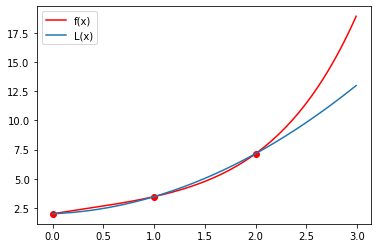

In [222]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_test, y_test, color="red", label="f(x)")
plt.plot(x_test, fit_y, label="L(x)")
plt.legend();

## Test Numerical Integration

In [216]:
importlib.reload(integration)

# Function to integrate
f = lambda x: 1 / (x + 4)

# Numerical integration parameters
a = 0 # Interval start
b = 2 # Interval end
N = 100 # Interval subdivisions

import scipy.integrate as integrate
ref_int = integrate.quad(f, a, b)
trap_int = integration.trapezoid(f, a, b, N)
simp_int = integration.simpson(f, a, b, N)

def rel_error(real, approx):
    return abs(real - approx)/real

trap_err = rel_error(ref_int[0], trap_int)
simp_err = rel_error(ref_int[0], simp_int)

print("Trapezoid relative error: {}".format(trap_err))
print("Simpson relative error: {}".format(simp_err))

Trapezoid relative error: 2.8545075883968455e-06
Simpson relative error: 4.1229099161422416e-11
